In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('problem1.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


1. EDA 및 데이터 전처리

시각화 및 통계량 제시

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


In [17]:
df.describe()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


TotRmsAbvGrd, KitchenAbvGr, BedroomAbvGr, GarageCars 변수는 범주형 변수로 판단

In [18]:
df.isna().sum()

Id                0
LotArea           0
LotFrontage     259
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
YearRemodAdd      0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
GarageCars        0
GarageArea        0
price             0
dtype: int64

LotArea 컬럼에만 결측치가 존재하는 것을 확인

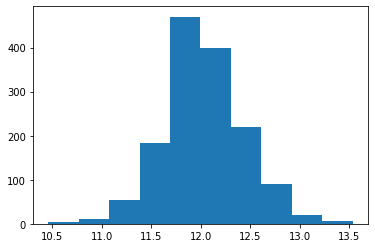

In [19]:
#종속변수 시각화
import matplotlib.pyplot as plt
plt.hist('price',data=df)
plt.show()

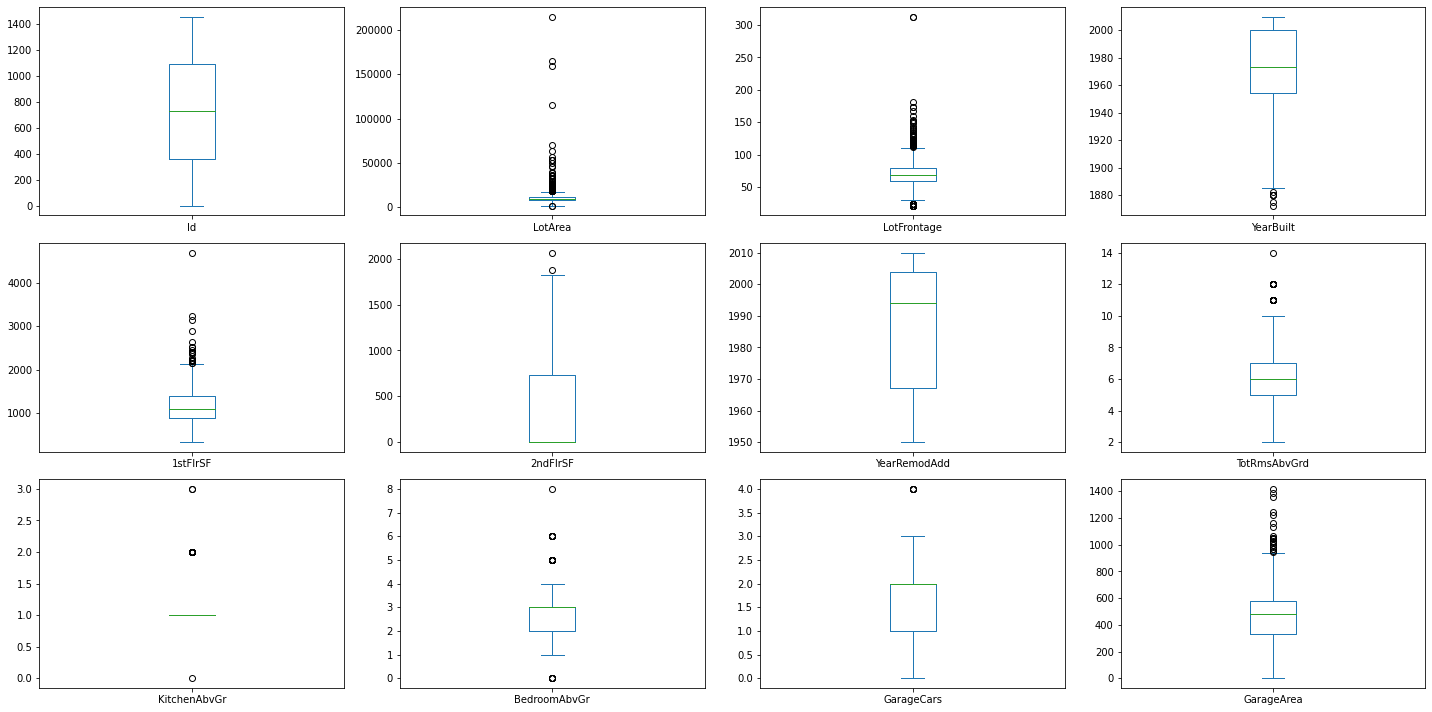

In [20]:
df_to_outliers = df.drop(columns='price')
df_to_outliers.plot(kind='box',subplots=True,layout=(3,4),figsize=(20,10))
plt.tight_layout()
plt.show()

<AxesSubplot:>

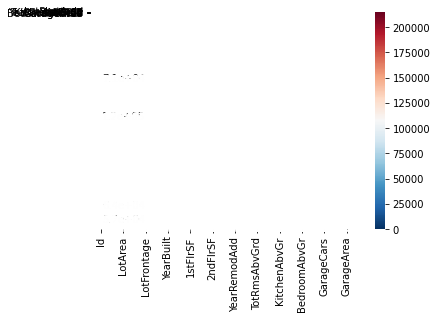

In [21]:
import seaborn as sns
sns.heatmap(df_to_outliers, xticklabels = df_to_outliers.columns, yticklabels=df_to_outliers.columns,
            cmap = 'RdBu_r',
            annot=True,
            linewidth=3)

2. Train, Valid, Test 로 분할및 시각화 제시

스케일링 전 시각화


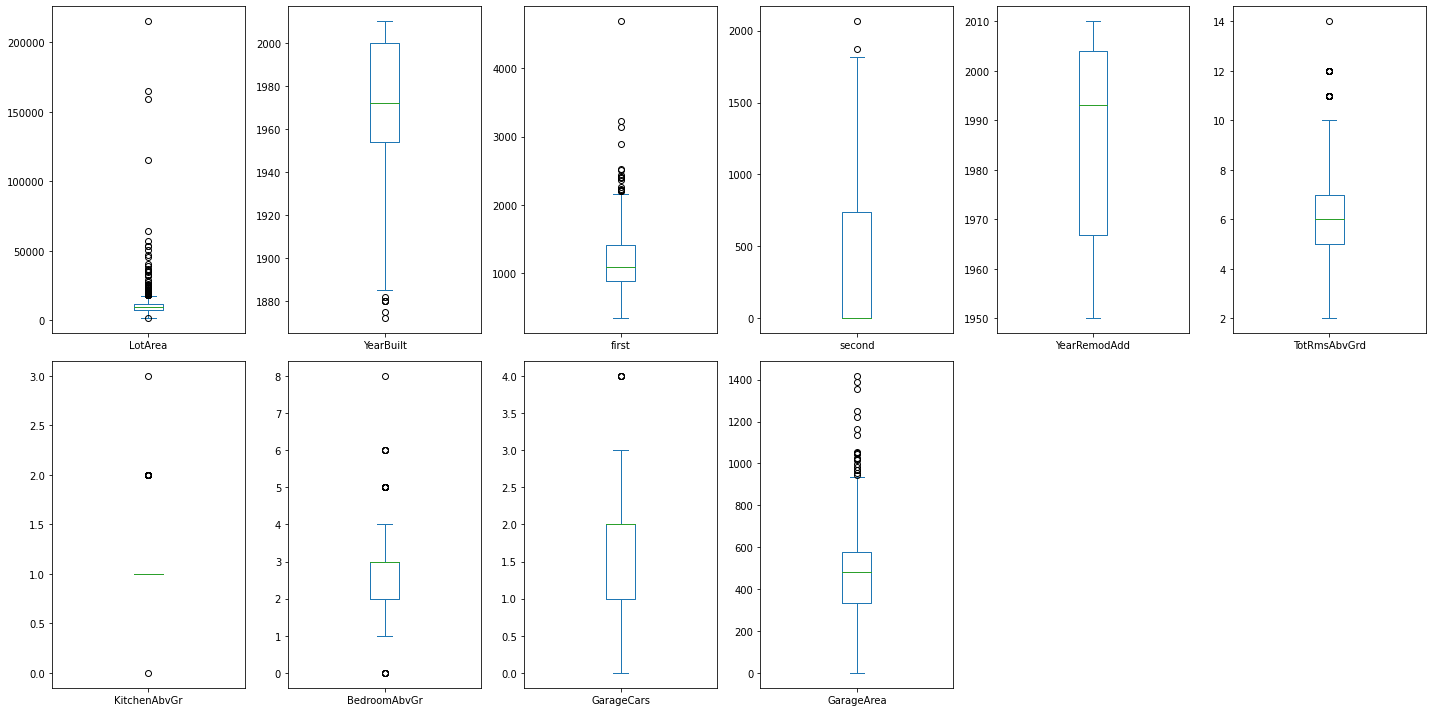

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = df.copy()

#컬럼에 숫자가 들어가면 statsmodels ols 동작 시 에러 발생
df2 = df.rename(columns = {'1stFlrSF':'first','2ndFlrSF':'second'})

x = df2.drop(columns=['price','Id','LotFrontage'])
y = df2[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


print('스케일링 전 시각화')
x_train.plot(kind='box',subplots=True, layout=(2,len(x_train.columns)//2+1),
             figsize=(20,10))

plt.tight_layout()
plt.show()

스케일링 후 시각화


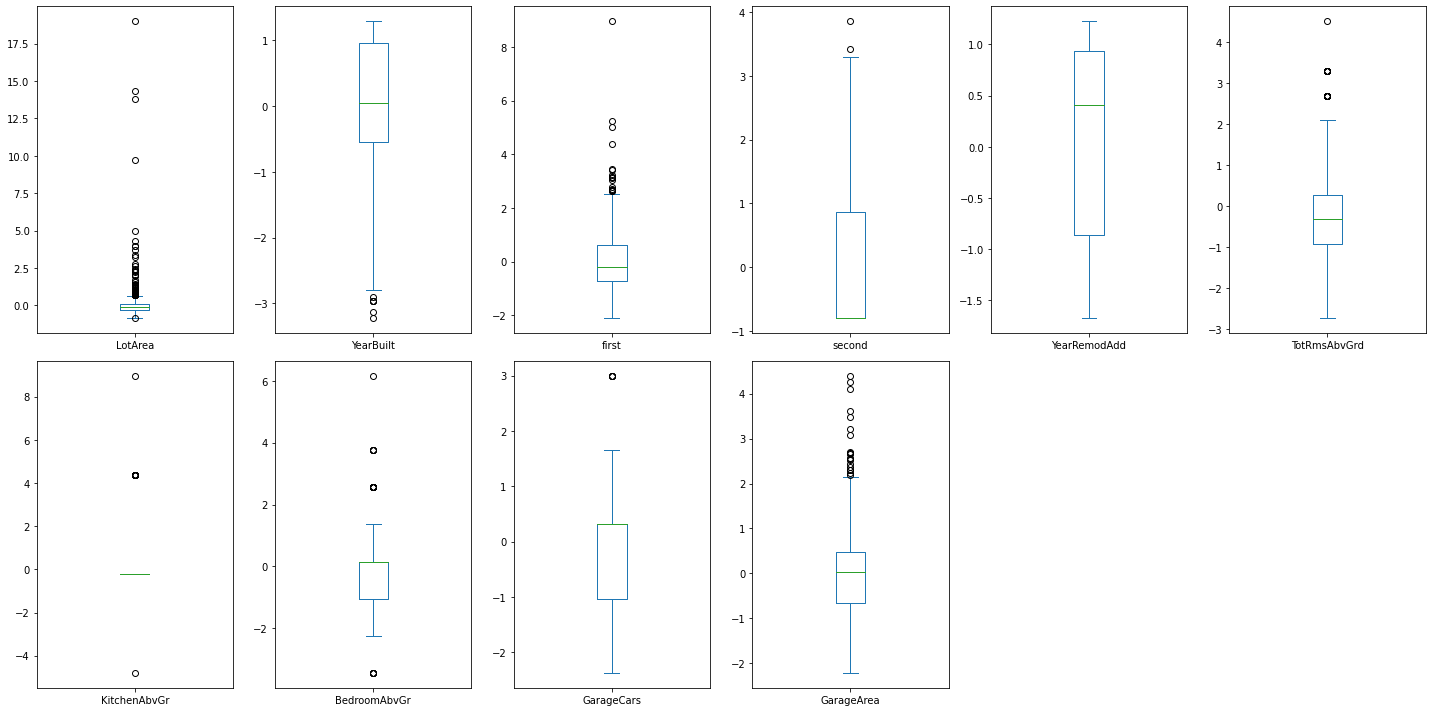

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_sc = scaler.transform(x_test)
x_train_sc
print('스케일링 후 시각화')
x_train_sc.plot(kind='box',subplots=True, layout=(2,len(x_train_sc.columns)//2+1),
             figsize=(20,10))

plt.tight_layout()
plt.show()

3. 2차 교호작용항까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [43]:
from itertools import permutations
comb = list(permutations(x_train.columns,3))
len(comb)

720

In [44]:
variables = '+ '.join(list(x_train.columns)) + '+' + '+'.join([':'.join(list(y)) for y in comb])

In [45]:
from statsmodels.formula.api import ols

res = ols(f'price~{variables}',
          data = pd.concat([x_train,y_train],axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     57.21
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:32:45   Log-Likelihood:                 622.97
No. Observations:                1022   AIC:                            -987.9
Df Residuals:                     893   BIC:                            -352.0
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.6357      7.083      0.513      0.608     -10.265      17.537
LotArea                                   -0.0002   7.76e-05     -2.192      0.029      -0.000   -1.78e-05
YearBuilt                                  0.0030      0.002      1.401      0.161      -0.001       0.007
first                                     -0.0027      0.002     -1.694      0.091      -0.006       0.000
second                                    -0.0011      0.001     -0.755      0.450      -0.004       0.002
YearRemodAdd                               0.0017      0.002      0.717      0.473      -0.003       0.006
TotRmsAbvGrd                               0.1032      0.429      0.240      0.810      -0.739       0.946
KitchenAbvGr                              -4.2070      3.629     -1.159      0.247     -11.329       2.915
BedroomAbvGr                               2.2927      0.605      3.787      0.000       1.104       3.481
GarageCars                                 0.6552      0.965      0.679      0.497      -1.238       2.548
GarageArea                                -0.0045      0.004     -1.266      0.206      -0.012       0.002
LotArea:YearBuilt:first                 6.789e-11   2.03e-10      0.334      0.738   -3.31e-10    4.67e-10
LotArea:YearBuilt:second               -4.994e-10   2.07e-10     -2.409      0.016   -9.06e-10   -9.26e-11
LotArea:YearBuilt:YearRemodAdd          1.314e-10   4.71e-11      2.792      0.005     3.9e-11    2.24e-10
LotArea:YearBuilt:TotRmsAbvGrd         -1.042e-08   6.72e-08     -0.155      0.877   -1.42e-07    1.21e-07
LotArea:YearBuilt:KitchenAbvGr         -6.249e-07   2.77e-07     -2.260      0.024   -1.17e-06   -8.22e-08
LotArea:YearBuilt:BedroomAbvGr          2.935e-07   1.17e-07      2.516      0.012    6.45e-08    5.22e-07
LotArea:YearBuilt:GarageCars           -1.388e-07   1.73e-07     -0.803      0.422   -4.78e-07       2e-07
LotArea:YearBuilt:GarageArea           -7.669e-11   5.31e-10     -0.144      0.885   -1.12e-09    9.65e-10
LotArea:first:second                   -2.456e-11   8.16e-12     -3.011      0.003   -4.06e-11   -8.55e-12
LotArea:first:YearRemodAdd             -5.066e-11   2.03e-10     -0.250      0.803   -4.49e-10    3.47e-10
LotArea:first:TotRmsAbvGrd              -3.99e-09   1.96e-09     -2.034      0.042   -7.84e-09   -1.41e-10
LotArea:first:KitchenAbvGr             -8.394e-08   1.79e-07     -0.470      0.638   -4.34e-07    2.67e-07
LotArea:first:BedroomAbvGr              2.744e-08   6.87e-09      3.992      0.000     1.4e-08    4.09e-08
LotArea:first:GarageCars                8.376e-09   1.29e-08      0.649      0.516   -1.69e-08    3.37e-08
LotArea:first:GarageArea               -2.063e-11   3.85e-11     -0.535      0.593   -9

4. 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라.

In [52]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

ls = Lasso()
rd = Ridge()
rf = RandomForestRegressor()


def modelpipe(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test,pred)
    r2 = r2_score(y_test,pred)
    
    
    return [mse,r2]

ls_result = modelpipe(ls)
rd_result = modelpipe(rd)
rf_result = modelpipe(rf)

result = pd.DataFrame([ls_result, rd_result, rf_result],
                      columns=['mse','r2'],
                      index=['lasso','ridge','randomforest'])

result

C:\Users\suhye\AppData\Local\Temp\ipykernel_18412\990972761.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


,mse,r2
lasso,0.035599,0.755582
ridge,0.031751,0.782003
randomforest,0.033511,0.769920
